In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Reading the CSV

In [2]:
df =pd.read_csv(r'C:\Users\Asus\Downloads\zomato.csv')


# Dropping cols that are not needed

In [5]:
df = df.drop(['url','address','phone','dish_liked','reviews_list','menu_item'],axis=1)

In [ ]:
df.head()

# Renaming cols with appropriate names

In [24]:
df=df.rename(columns={'approx_cost(for two people)':'Cost2ppl','listed_in(city)':'City','listed_in(type)':'Type'})

# Removing duplicates

In [7]:
df.drop_duplicates(inplace=True)


In [ ]:
df.shape

In [ ]:
df.info()

# Replace Null values in rate column with its mean value.

In [ ]:
df['rate'].isnull().sum()



In [8]:
df['rate'].fillna(df['rate'].mean,inplace=True)


In [ ]:
df['rate'].isnull().sum()

# Remove duplicates

In [ ]:
df.shape

In [ ]:
df.dropna(inplace=True)


# Modifying the Rate column

In [3]:
def ModifyRate(rate):
    if(rate=='NEW' or rate=='-'):
        return np.nan
    else:
        rate=str(rate).split('/')
        rate=rate[0]
        return float(rate)
    

    

In [4]:
#using the above function to rate column
df['rate']=df['rate'].apply(ModifyRate)

In [ ]:
    df.head()

In [ ]:
df['rest_type'].unique()

# Cleaning rest type column

In [9]:
rest_types=df['rest_type'].value_counts(ascending=False)

In [11]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

Beverage Shop                 865
Bar                           697
Food Court                    621
Sweet Shop                    468
Bar, Casual Dining            420
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: rest_type, Length: 85, dtype: int64

In [12]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        


Quick Bites           19096
Casual Dining         10309
others                 9071
Cafe                   3727
Delivery               2600
Dessert Parlor         2260
Takeaway, Delivery     2031
Casual Dining, Bar     1148
Bakery                 1140
Name: rest_type, dtype: int64

In [ ]:
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()
        

#Cleaning Location Column


In [14]:
df = df.drop(['listed_in(city)'], axis = 1)


In [18]:
location = df['location'].value_counts(ascending  = False)

location_lessthan300 = location[location<300]



def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

BTM                      5109
others                   4699
HSR                      2521
Koramangala 5th Block    2502
JP Nagar                 2234
Whitefield               2140
Indiranagar              2075
Jayanagar                1926
Marathahalli             1843
Bannerghatta Road        1628
Bellandur                1283
Electronic City          1256
Koramangala 1st Block    1237
Brigade Road             1210
Koramangala 7th Block    1179
Koramangala 6th Block    1154
Sarjapur Road            1063
Koramangala 4th Block    1017
Ulsoor                   1017
MG Road                   917
Banashankari              904
Kalyan Nagar              853
Richmond Road             811
Malleshwaram              722
Frazer Town               720
Basavanagudi              684
Residency Road            672
Banaswadi                 659
Brookefield               658
New BEL Road              649
Kammanahalli              647
Rajajinagar               591
Church Street             566
Lavelle Ro

# Cleaning Cuisines Column

In [21]:
cuisines = df['cuisines'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

others                                 26397
North Indian                            2907
North Indian, Chinese                   2381
South Indian                            1826
Biryani                                  915
                                       ...  
South Indian, Chinese, North Indian      105
Italian, Pizza                           105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [26]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2ppl,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


# Removing , from Cost2Plates Column

In [29]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
df['Cost2ppl'] = df['Cost2ppl'].apply(handlecomma)
df['Cost2ppl'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

# Data Cleaning completed - Next visualization

###### Count Plot of Various Locations

Text(0.5, 1.0, 'Count plot for various locations')

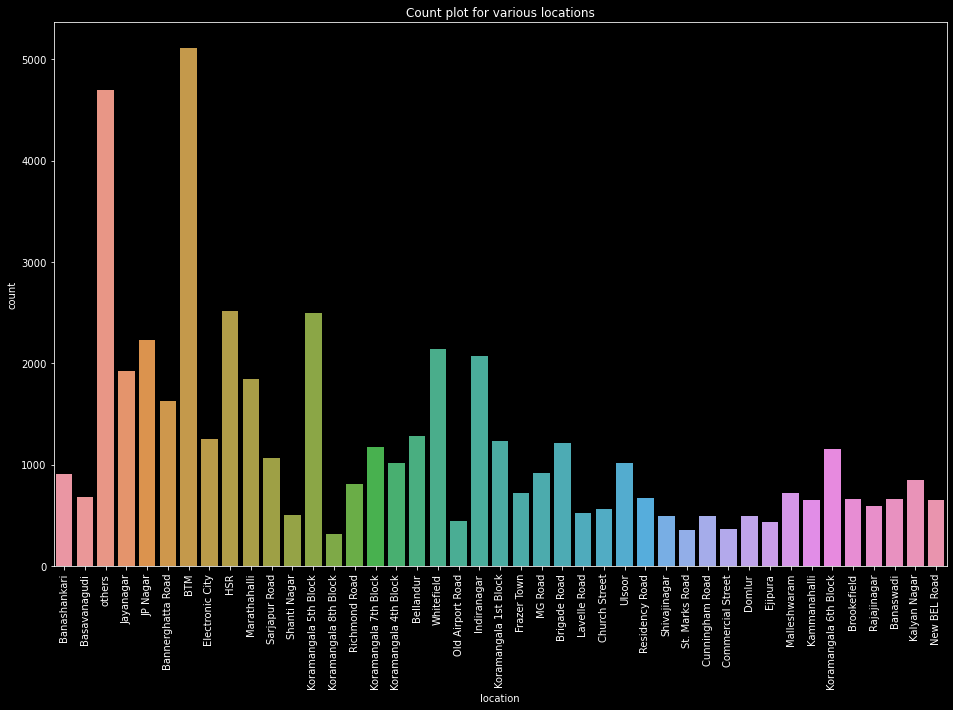

In [38]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x=df['location'])
plt.xticks(rotation=90)
plt.title('Count plot for various locations')

###### Visualizing Online Order

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

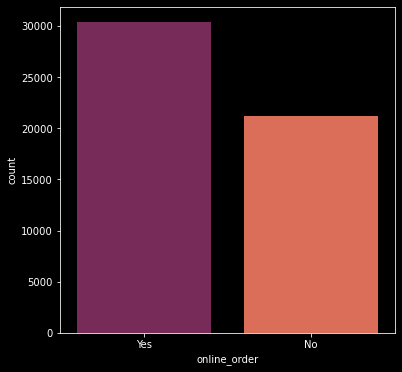

In [42]:
plt.figure(figsize = (6,6))
sns.countplot(df['online_order'], palette = 'rocket')

###### Visualizing Book Table¶


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

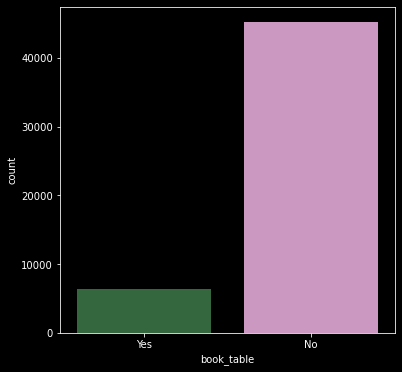

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(df['book_table'], palette = 'cubehelix')

###### Visualizing Online Order Facility, Location Wise¶



In [61]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1789  3320
Banashankari            397   507
Banaswadi               321   338
Bannerghatta Road       704   924
Basavanagudi            243   441
Bellandur               523   760
Brigade Road            552   658
Brookefield             241   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  261   235
Ejipura                 219   219
Electronic City         681   575
Frazer Town             293   427
HSR                     602  1919
Indiranagar             743  1332
JP Nagar                917  1317
Jayanagar               562  1364
Kalyan Nagar            355   498
Kammanahalli            267   380
Koramangala 1st Block   385   852
Koramangala 4th Block   459   558
Koramangala 5th Block   889  1613
Koramangala 6th Block   457   697
Koramangala 7th Block   394   785
Koramangala 8th Block   108   212
Lavelle Road            321   203
MG Road                 544   373
Malleshwaram            310   412
Marathahalli            734  1109
New BEL Road            257   392
Old Airport Road        230   216
Rajajinagar             286   305
Residency Road          425   247
Richmond Road           565   246
Sarjapur Road           335   728
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          185   167
Ulsoor                  395   622
Whitefield             1005  1135
others                 2008  2691

<AxesSubplot:xlabel='location'>

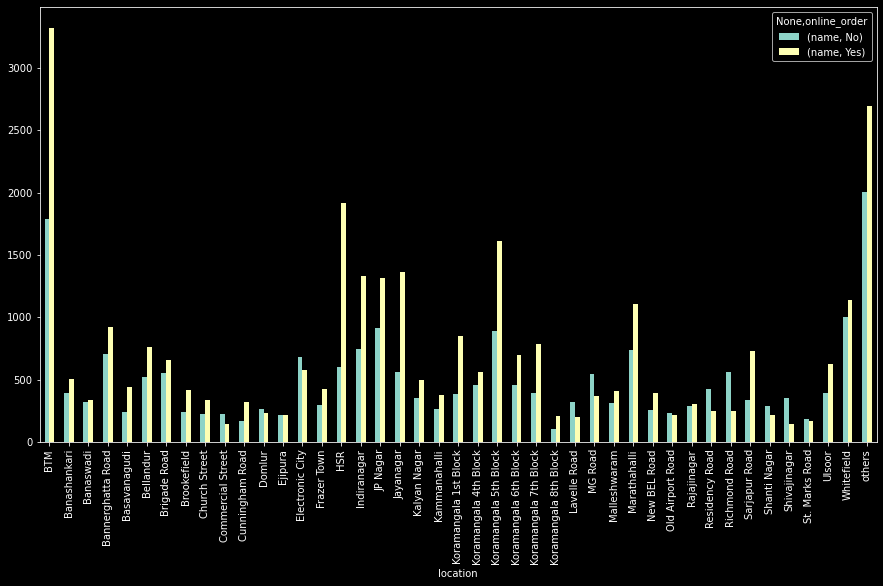

In [62]:
df1.plot(kind = 'bar', figsize = (15,8))